# Lab 4 Decission Trees 

In [92]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import sklearn.model_selection as skm


from sklearn.tree import (
    DecisionTreeClassifier as DTC,
    DecisionTreeRegressor as DTR,
    plot_tree,
    export_text,
)
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

# Exercice 1 Exercice 

Draw an example (of your invention ) of a partition of two-dimenseional feature space that could result from recursive binary splitting. Your example should contain a least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures includng $R_1,R_2,\cdots$, the cutpoints  $t_1,t2,\cdots$ and so forth.

## Exercice 2 Regression trees

In the exersice,  we will
seek to predict Sales (Carseats data) using regression trees and related approaches treating the response as a quantitaive variable.

1. Import the csv file 'Carseats.csv' and briefly analyse it

In [93]:
Carseats = pd.read_csv("../Data/Carseats.csv")
Carseats.shape

(400, 11)

In [94]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


As we can see there is some categorical variables. So we need to transform in `Dummies`variables as in chapter 3 and we create the features matrix with added $n-1$ columns to a categorial variable with $n$ levels.

In [95]:
# create Dummies Variables to transform Qualitative/categortial variables in 0-1 variables
dummies = pd.get_dummies(Carseats[["ShelveLoc", "Urban", "US"]]).astype("float64")

# Drop the column with the independent variable (Sales), and columns for which we created dummy variables
X_ = Carseats.drop(["Sales", "ShelveLoc", "Urban", "US"], axis=1).astype("float64")


# Define the feature set X and transform it in an array
D = pd.concat(
    [X_, dummies[["ShelveLoc_Good", "ShelveLoc_Medium", "Urban_Yes", "US_Yes"]]], axis=1
)

Y = np.array(Carseats["Sales"])
X = D.astype("float64")

2. Split the data set into a training set and a test set with a test_size=0.3

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

3. Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [97]:
clf = DTR(criterion="squared_error", random_state=42)

clf = clf.fit(X_train, y_train)

mean_squared_error(y_test, clf.predict(X_test))

4.805344166666667

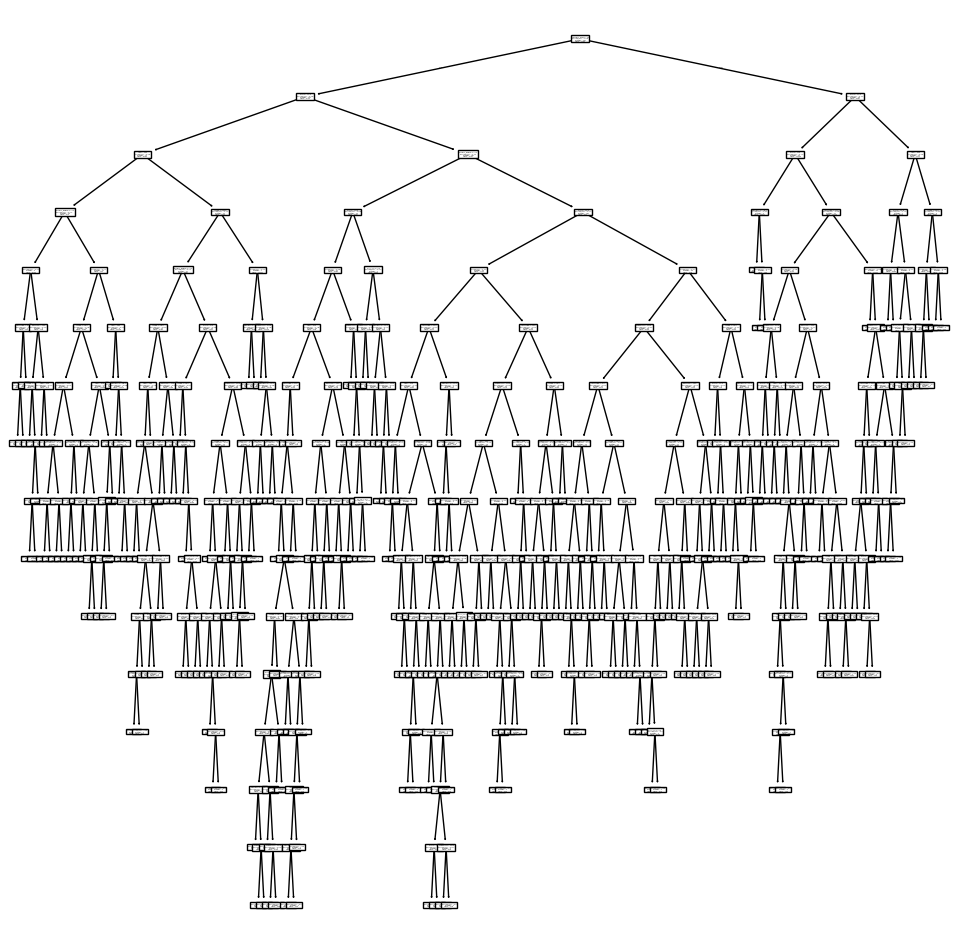

In [98]:
feature_names = D.columns

ax = subplots(figsize=(12, 12))[1]
plot_tree(clf, feature_names=feature_names, ax=ax)

plt.show()

4. Use cross-validation in order to determine the optimal level of
tree complexity. Plot the pruned tree. Does pruning the tree improve the test MSE?

In [99]:
ccc_path = clf.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10, random_state=42, shuffle=True)
grid = skm.GridSearchCV(
    clf,
    {"ccp_alpha": ccc_path.ccp_alphas},
    refit=True,
    cv=kfold,
    scoring="neg_mean_squared_error",
)
grid.fit(X_train, y_train)

best_ = grid.best_estimator_
mean_squared_error(y_test, best_.predict(X_test))

4.962995939319524

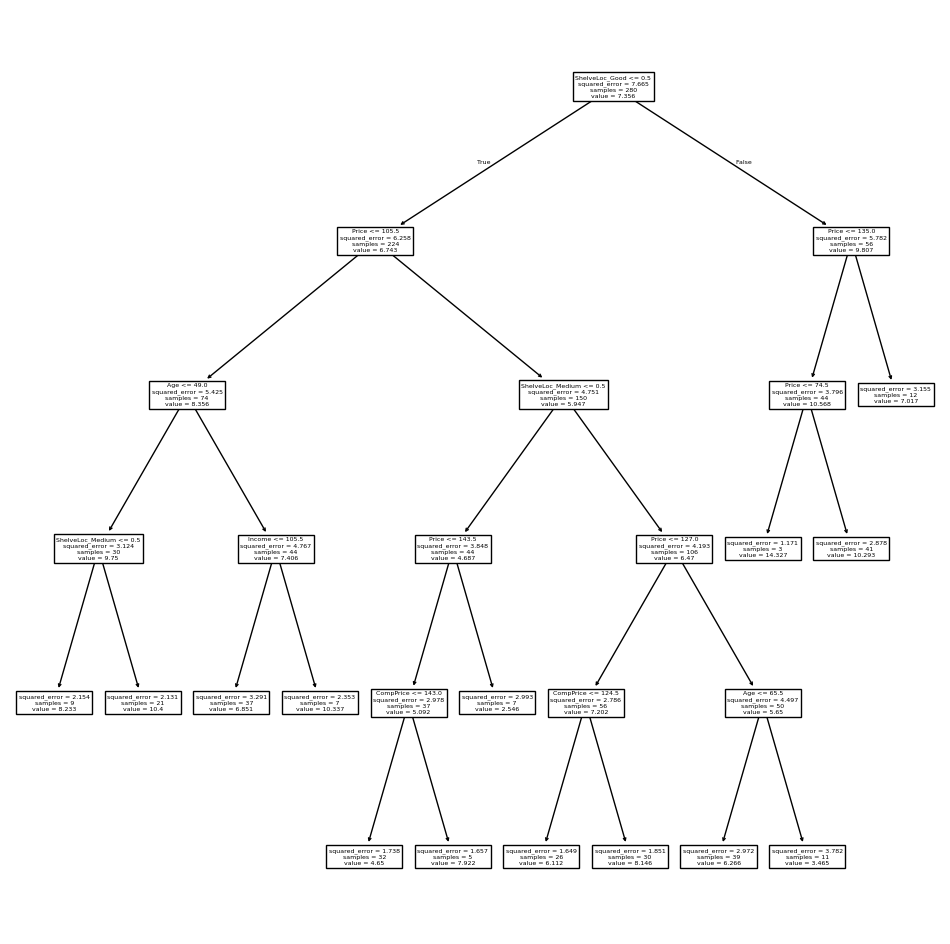

In [100]:
ax = subplots(figsize=(12, 12))[1]
plot_tree(best_, feature_names=feature_names, ax=ax)

plt.show()

5. Compare your result with a PCR or PLS regression.

## Exercise 3
This problem involves the OJ data set which is part of the ISLP
package. see Exercise 9 in textbook.
1. Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
2. Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?
1. Create a plot of the tree, and interpret the results. How many
terminal nodes does the tree have?
1. Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.
1. Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?
1. Use cross-validation on the training set in order to determine
the optimal tree size.
1. Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.
1. Which tree size corresponds to the lowest cross-validated classi-
fication error rate?
1. Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.
1.  Compare the training error rates between the pruned and un-
pruned trees. Which is higher?
1.  Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [101]:
OJ = load_data("OJ")

In [102]:
OJ

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [103]:
categorical_columns = ["Purchase", "SpecialCH", "SpecialMM", "Store7"]
OJ[categorical_columns] = OJ[categorical_columns].astype("category")

# create Dummies Variables to transform Qualitative/categortial variables in 0-1 variables
dummies = pd.get_dummies(OJ[["Store7", "SpecialCH", "SpecialMM"]]).astype("float64")

dummies

,Store7_No,Store7_Yes,SpecialCH_0,SpecialCH_1,SpecialMM_0,SpecialMM_1
0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1065,0.0,1.0,1.0,0.0,1.0,0.0
1066,0.0,1.0,1.0,0.0,1.0,0.0
1067,0.0,1.0,1.0,0.0,1.0,0.0
1068,0.0,1.0,1.0,0.0,1.0,0.0


In [104]:
# Drop the column with the independent variable (Sales), and columns for which we created dummy variables
X_ = OJ.drop(["Purchase", "Store7", "SpecialCH", "SpecialMM"], axis=1).astype("float64")


# Define the feature set X and transform it in an array
D = pd.concat(
    [
        X_,
        dummies[
            [
                "Store7_Yes",
                "SpecialCH_1",
                "SpecialMM_1",
            ]
        ],
    ],
    axis=1,
)

Y = np.array(OJ["Purchase"])
X = D.astype("float64")

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [106]:
# Learn a Decision Tree
clf = DTC(criterion="entropy", random_state=42)

clf = clf.fit(X_train, y_train)

0.6822429906542056

 CONFUSION MATRIX
Truth       CH  MM
Predicted         
CH         145  48
MM          54  74


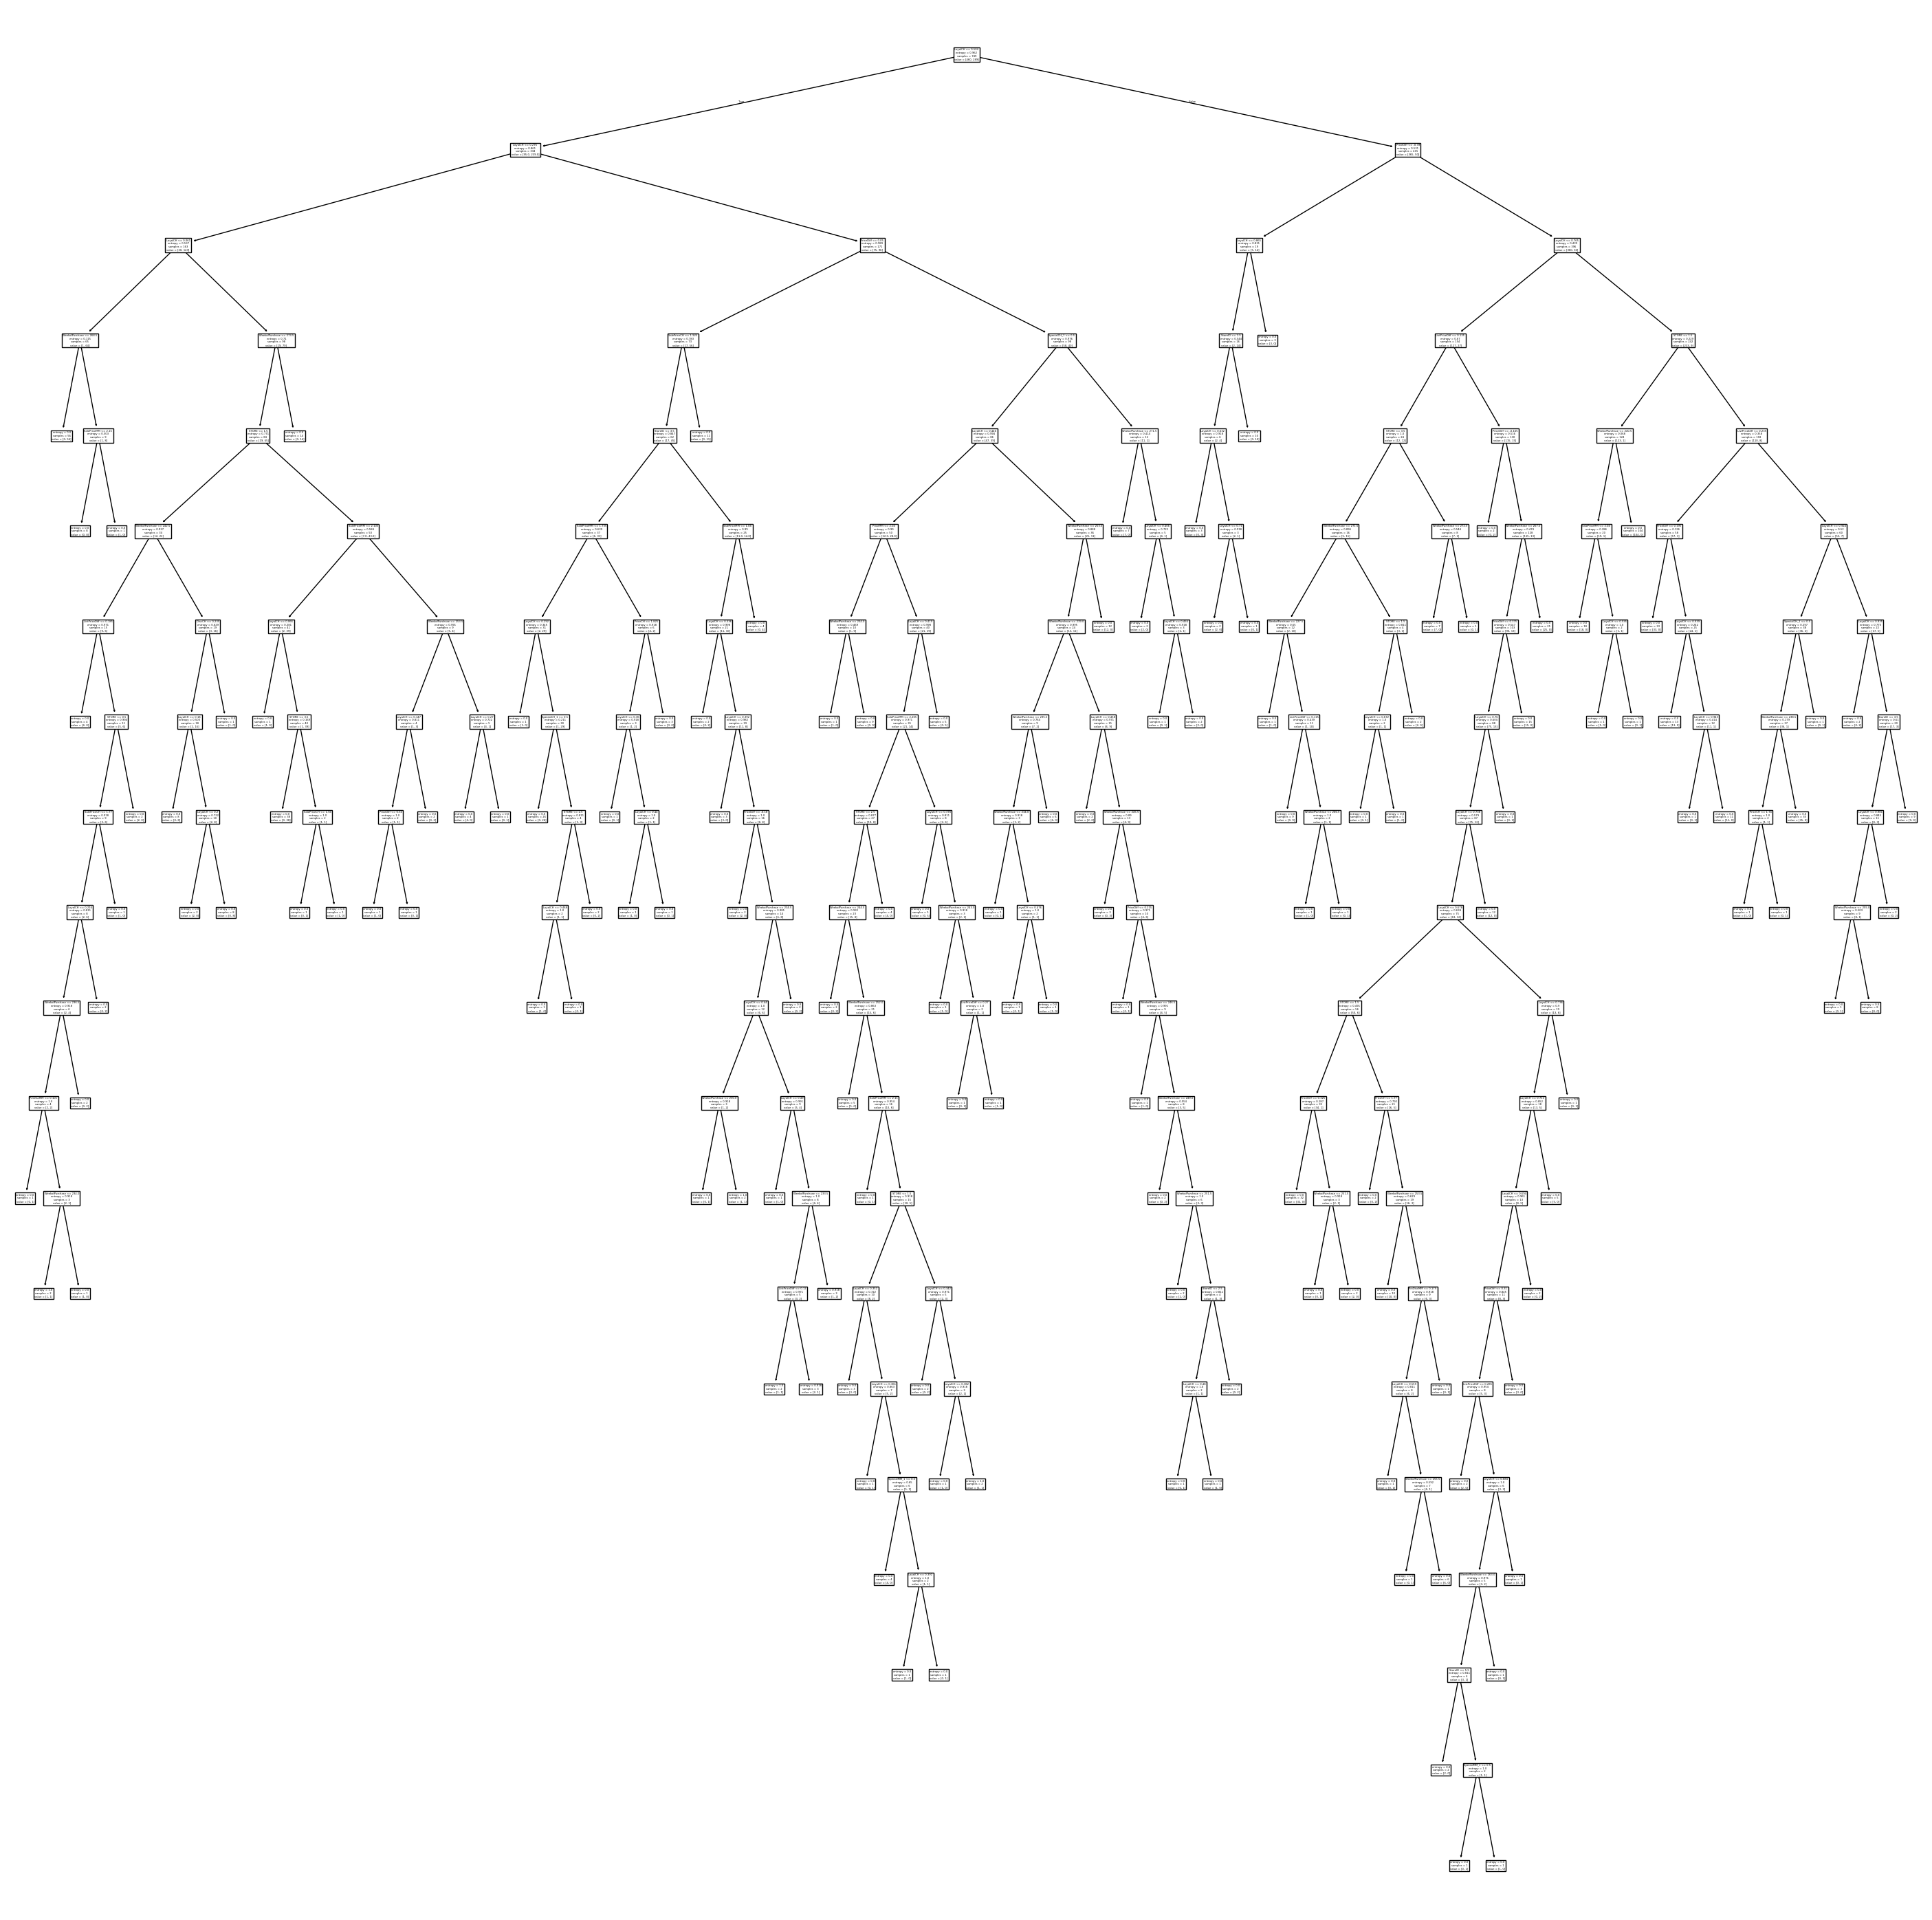

In [107]:
# Names of colums in a vector
feature_names = X.columns

# Plot of the tree
ax = subplots(figsize=(36, 36))[1]
plot_tree(clf, feature_names=feature_names, ax=ax)

# Evaluate acuracy on test data
print(accuracy_score(y_test, clf.predict(X_test)))

# accuracy_score : return the fraction of correctly classified samples (float)
y_true, y_pred = y_test, clf.predict(X_test)
print("\n CONFUSION MATRIX")
confusion = confusion_table(y_true, y_pred)
print(confusion)

plt.show()